# Ejercicio de Análisis de Comunidades

Martín Salinas Antón<br>
Belén Vivas García

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import community

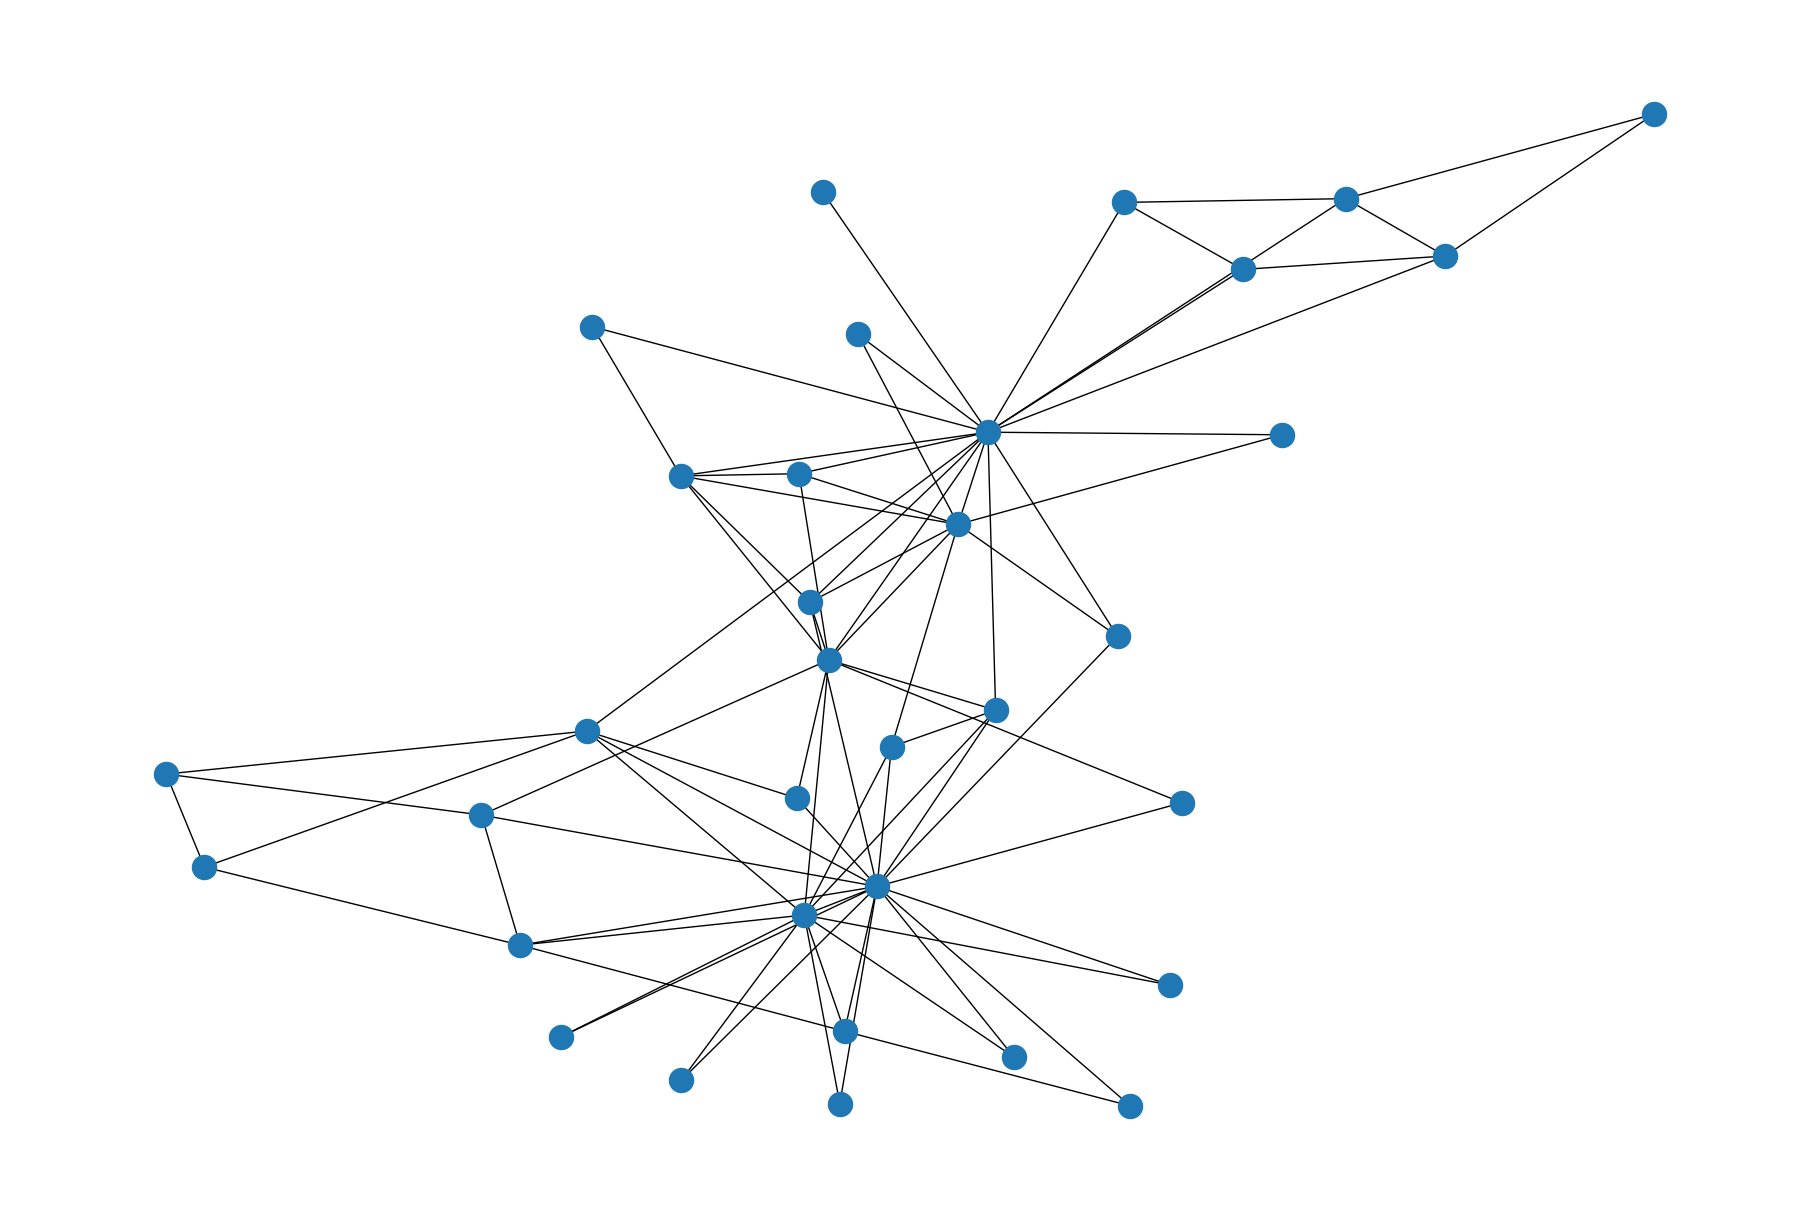

In [2]:
# Reading graph file
data_path = "./data/zachary.graphml"
karate = nx.read_graphml(data_path)

# Drawing graph
plt.figure(figsize=(18,12))
nx.draw(karate)

### Asortividad

In [3]:
print(nx.degree_assortativity_coefficient(karate))

-0.47561309768461413


In [4]:
particiones = nx.algorithms.approximation.maxcut.randomized_partitioning(karate, p=0.5)[1]
particion1 = particiones[0]
particion2 = particiones[1]
interno = externo = 0
for n in particion1:
    arcos = nx.edges(karate, [n])
    for a in arcos:
        if a[0] in particion1 and a[1] in particion1:
            interno +=1
        else:
            externo += 1
print(f"Suma arcos internos: {interno/2}; suma arcos externos: {externo}")

N = len(particion1) + len(particion2)
nc = len(particion1)
dens_intra = interno / (nc*(nc-1)/2)
dens_inter = externo / (nc * (N-nc))

print(f"Densidad intra cluster: {dens_intra}")
print(f"Densidad inter cluster: {dens_inter}")

Suma arcos internos: 24.0; suma arcos externos: 37
Densidad intra cluster: 0.22857142857142856
Densidad inter cluster: 0.13553113553113552


**Ejercicio:** Calcular
1) Conductance  
2) Expansion

### Modularidad

In [5]:
subgrafo = nx.algorithms.approximation.maxcut.randomized_partitioning(karate, p=0.5)[1]
community.quality.modularity( karate, subgrafo)

0.038461538461538436

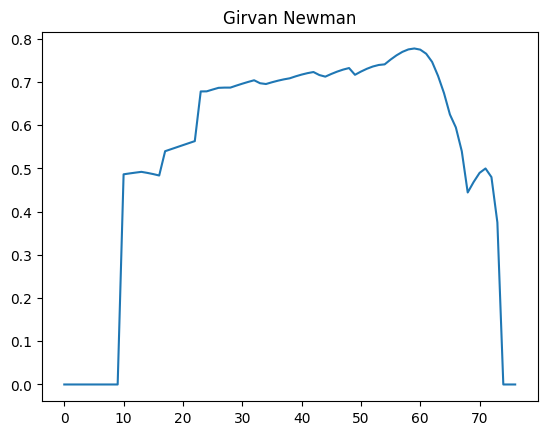

In [6]:
# Initialize variables
subgraph_dict = None
karate_copy = karate.copy()
modularity_list = []

# Loop until there is only one edge left
while len(list(nx.edges(karate_copy))) != 1:
    # Calculate edge betweenness centrality
    subgraph_dict = nx.edge_betweenness_centrality(karate_copy)
    # Sort the dictionary by values in descending order
    subgraph_dict = dict(sorted(subgraph_dict.items(), key=lambda item: item[1], reverse=True))
    # Remove the edge with the highest betweenness centrality
    karate_copy.remove_edge(list(subgraph_dict.keys())[0][0], list(subgraph_dict.keys())[0][1])
    # Calculate and append the modularity of the graph
    modularity_list.append(nx.community.modularity(karate_copy, nx.connected_components(karate_copy)))

# Plot the modularity values
plt.plot(modularity_list)
plt.title("Girvan Newman")
plt.show()